In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
vaccines_path = "Resources/country vaccinations.csv"
HDI_path = "Resources/HDI.csv"
OWIDCOVID_path = "Resources/owid-covid-data.csv"

vaccines_df = pd.read_csv(vaccines_path)
HDI_df = pd.read_csv(HDI_path)
OWIDCOVID_df = pd.read_csv(OWIDCOVID_path)

In [3]:
OWIDCOVID_work_df= pd.DataFrame({"Continent":OWIDCOVID_df["continent"],
                                   "Country":OWIDCOVID_df["location"],
                                   "People Vaccinated Total":OWIDCOVID_df["people_vaccinated"],
                                   "People Fully Vaccinated":OWIDCOVID_df["people_fully_vaccinated"],
                                   "% People Vaccinated":OWIDCOVID_df["people_vaccinated_per_hundred"],
                                   "% of People Fully Vaccinated":OWIDCOVID_df["people_fully_vaccinated_per_hundred"],
                                   "GDP per Capita":OWIDCOVID_df["gdp_per_capita"],
                                   "Human Development Index":OWIDCOVID_df["human_development_index"],
                                   "Population":OWIDCOVID_df["population"]})
OWIDCOVID_work_df.head()

,Continent,Country,People Vaccinated Total,People Fully Vaccinated,% People Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population
0,Asia,Afghanistan,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
1,Asia,Afghanistan,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
2,Asia,Afghanistan,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
3,Asia,Afghanistan,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
4,Asia,Afghanistan,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0


In [4]:
OWIDCOVID_work_df.dropna(inplace = True)

In [5]:
OWIDCOVID_clean_df = OWIDCOVID_work_df.groupby('Country')[["People Vaccinated Total", "People Fully Vaccinated", "% People Vaccinated", "% of People Fully Vaccinated", "GDP per Capita", "Human Development Index", "Population"]].max()
OWIDCOVID_clean_df.head()

,People Vaccinated Total,People Fully Vaccinated,% People Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population
Country,,,,,,,
Afghanistan,770542.0,430744.0,1.93,1.08,1803.987,0.511,39835428.0
Albania,895363.0,702833.0,31.17,24.46,11803.431,0.795,2872934.0
Algeria,5000000.0,3000000.0,11.21,6.72,13913.839,0.748,44616626.0
Angola,1165755.0,920570.0,3.44,2.71,5819.495,0.581,33933611.0
Antigua and Barbuda,43681.0,35709.0,44.24,36.17,21490.943,0.778,98728.0


In [6]:
OWIDCOVID_clean_df['% People Partially Vaccinated'] = ""
OWIDCOVID_clean_df['% People Partially Vaccinated'] = OWIDCOVID_clean_df["% People Vaccinated"] - OWIDCOVID_clean_df["% of People Fully Vaccinated"]

In [8]:
OWIDCOVID_clean_df['% People Partially Vaccinated'] = OWIDCOVID_clean_df['% People Partially Vaccinated'].astype(float).map("{:,.2f}%".format)
OWIDCOVID_clean_df['% of People Fully Vaccinated'] = OWIDCOVID_clean_df['% of People Fully Vaccinated'].astype(float).map("{:,.2f}%".format)
OWIDCOVID_clean_df['People Vaccinated Total'] = OWIDCOVID_clean_df['People Vaccinated Total'].astype(int)
OWIDCOVID_clean_df['People Fully Vaccinated'] = OWIDCOVID_clean_df['People Fully Vaccinated'].astype(int)
OWIDCOVID_clean_df['Population'] = OWIDCOVID_clean_df['Population'].astype(int)
OWIDCOVID_clean_df['GDP per Capita'] = OWIDCOVID_clean_df['GDP per Capita'].round(2)
OWIDCOVID_clean_df.head()

,People Vaccinated Total,People Fully Vaccinated,% People Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population,% People Partially Vaccinated
Country,,,,,,,,
Afghanistan,770542,430744,1.93,1.08%,1803.99,0.511,39835428,0.85%
Albania,895363,702833,31.17,24.46%,11803.43,0.795,2872934,6.71%
Algeria,5000000,3000000,11.21,6.72%,13913.84,0.748,44616626,4.49%
Angola,1165755,920570,3.44,2.71%,5819.50,0.581,33933611,0.73%
Antigua and Barbuda,43681,35709,44.24,36.17%,21490.94,0.778,98728,8.07%


In [9]:
OWIDCOVID_clean_df.drop(columns = '% People Vaccinated')
OWIDCOVID_clean_df = OWIDCOVID_clean_df[['People Vaccinated Total', 'People Fully Vaccinated','% People Partially Vaccinated','% of People Fully Vaccinated','GDP per Capita', 'Human Development Index', 'Population']]
OWIDCOVID_clean_df.head()

,People Vaccinated Total,People Fully Vaccinated,% People Partially Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population
Country,,,,,,,
Afghanistan,770542,430744,0.85%,1.08%,1803.99,0.511,39835428
Albania,895363,702833,6.71%,24.46%,11803.43,0.795,2872934
Algeria,5000000,3000000,4.49%,6.72%,13913.84,0.748,44616626
Angola,1165755,920570,0.73%,2.71%,5819.50,0.581,33933611
Antigua and Barbuda,43681,35709,8.07%,36.17%,21490.94,0.778,98728


In [10]:
OWIDCOVID_clean_df.reset_index(inplace=True)
OWIDCOVID_clean_df.head()

,Country,People Vaccinated Total,People Fully Vaccinated,% People Partially Vaccinated,% of People Fully Vaccinated,GDP per Capita,Human Development Index,Population
0,Afghanistan,770542,430744,0.85%,1.08%,1803.99,0.511,39835428
1,Albania,895363,702833,6.71%,24.46%,11803.43,0.795,2872934
2,Algeria,5000000,3000000,4.49%,6.72%,13913.84,0.748,44616626
3,Angola,1165755,920570,0.73%,2.71%,5819.50,0.581,33933611
4,Antigua and Barbuda,43681,35709,8.07%,36.17%,21490.94,0.778,98728


In [11]:
new_df = pd.DataFrame({"Country":OWIDCOVID_clean_df["Country"],
    "Fully vaccinated":OWIDCOVID_clean_df["% of People Fully Vaccinated"],
                      "GDP":OWIDCOVID_clean_df["GDP per Capita"],
                      "HDI":OWIDCOVID_clean_df["Human Development Index"],
                      "Pop":OWIDCOVID_clean_df["Population"]})
new_df.head()

,Country,Fully vaccinated,GDP,HDI,Pop
0,Afghanistan,1.08%,1803.99,0.511,39835428
1,Albania,24.46%,11803.43,0.795,2872934
2,Algeria,6.72%,13913.84,0.748,44616626
3,Angola,2.71%,5819.50,0.581,33933611
4,Antigua and Barbuda,36.17%,21490.94,0.778,98728


In [12]:
repl_dict={"%":""}

In [13]:
new_df["Fully vaccinated"]=new_df["Fully vaccinated"].replace(repl_dict,regex=True)

In [14]:
new_df.dropna()

,Country,Fully vaccinated,GDP,HDI,Pop
0,Afghanistan,1.08,1803.99,0.511,39835428
1,Albania,24.46,11803.43,0.795,2872934
2,Algeria,6.72,13913.84,0.748,44616626
3,Angola,2.71,5819.50,0.581,33933611
4,Antigua and Barbuda,36.17,21490.94,0.778,98728
...,...,...,...,...,...
173,Venezuela,11.62,16745.02,0.711,28704947
174,Vietnam,5.15,6171.88,0.704,98168829
175,Yemen,0.04,1479.15,0.470,30490639
176,Zambia,1.56,3689.25,0.584,18920657


In [15]:
new_df['Fully vaccinated'] = new_df['Fully vaccinated'].astype(float)

In [16]:
new_df

,Country,Fully vaccinated,GDP,HDI,Pop
0,Afghanistan,1.08,1803.99,0.511,39835428
1,Albania,24.46,11803.43,0.795,2872934
2,Algeria,6.72,13913.84,0.748,44616626
3,Angola,2.71,5819.50,0.581,33933611
4,Antigua and Barbuda,36.17,21490.94,0.778,98728
...,...,...,...,...,...
173,Venezuela,11.62,16745.02,0.711,28704947
174,Vietnam,5.15,6171.88,0.704,98168829
175,Yemen,0.04,1479.15,0.470,30490639
176,Zambia,1.56,3689.25,0.584,18920657


In [17]:
pip install pingouin --user

Note: you may need to restart the kernel to use updated packages.


In [18]:
from scipy.stats import linregress
import pingouin as pg

This graph displays a strong positive correlation between the percentage of people fully vaccinated against COVID-19 and GDP per capita for countries around the world, r = 0.71, p = 0.0. This suggests that a country with strong economy is more likely to be able to roll out the vaccine quicker potentially due to being able to afford paying for the vaccines and also the necessary processes involved such as paying for the facilities needed for vaccination centres and the requisite staff. However, this relationship only explains 51% of the variance in the data which indicates that other variables are having an impact on this relationship.


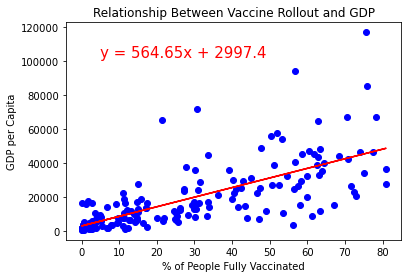

In [55]:
full_vaxxed = new_df['Fully vaccinated']
GDP = new_df['GDP']

plt.title("Relationship Between Vaccine Rollout and GDP")
plt.xlabel("% of People Fully Vaccinated")
plt.ylabel("GDP per Capita")

(slope, intercept, rvalue, pvalue, stderr) = linregress(full_vaxxed, GDP)
regress_values = pd.Series(full_vaxxed) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(full_vaxxed, GDP, marker="o", color="blue")
plt.plot(full_vaxxed, regress_values, "r-")
plt.annotate(line_eq,(5,102000),fontsize = 15,color = "red")

print(f"This graph displays a strong positive correlation between the percentage of people fully vaccinated against COVID-19 and GDP per capita for countries around the world, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}. This suggests that a country with strong economy is more likely to be able to roll out the vaccine quicker potentially due to being able to afford paying for the vaccines and also the necessary processes involved such as paying for the facilities needed for vaccination centres and the requisite staff. However, this relationship only explains 51% of the variance in the data which indicates that other variables are having an impact on this relationship.")
plt.show()

In [57]:
print("As can be seen in the below table, the relationship between a country's GDP per capita and the percent of the population fully vaccinated aginast COVID-19 only changes very marginally when controlling for a country's population, r = 0.72. This elimates one of the possible confounding variables effecting the relationship.")
pg.partial_corr(data = new_df, x = 'Fully vaccinated', y = 'GDP', covar = 'Pop')

As can be seen in the below table, the relationship between a country's GDP per capita and the percent of the population fully vaccinated aginast COVID-19 only changes very marginally when controlling for a country's population, r = 0.72. This elimates one of the possible confounding variables effecting the relationship.


,n,r,CI95%,p-val
pearson,178,0.715687,"[0.64, 0.78]",4.398819e-29


This graph displays a strong positive correlation between the percentage of people fully vaccinated against COVID-19 and the Human Development Index for countries around the world, r = 0.79, p = 0.0, This indicates that the more developed a country is, the more likely it is to organise an effective vaccine rollout. However, This relationship explains 62% of the variance in the data meaning that other variables are impacting this relationship.


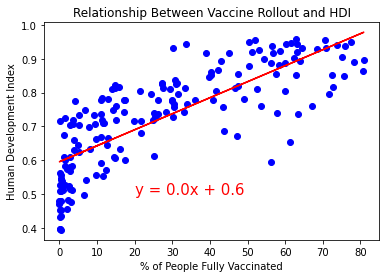

In [65]:
full_vaxxed = new_df['Fully vaccinated']
HDI = new_df["HDI"]

plt.title("Relationship Between Vaccine Rollout and HDI")
plt.xlabel("% of People Fully Vaccinated")
plt.ylabel("Human Development Index")

(slope, intercept, rvalue, pvalue, stderr) = linregress(full_vaxxed, HDI)
regress_values = pd.Series(full_vaxxed) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(full_vaxxed, HDI, marker="o", color="blue")
plt.plot(full_vaxxed, regress_values, "r-")
plt.annotate(line_eq,(20,.5),fontsize = 15,color = "red")

print(f"This graph displays a strong positive correlation between the percentage of people fully vaccinated against COVID-19 and the Human Development Index for countries around the world, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}, This indicates that the more developed a country is, the more likely it is to organise an effective vaccine rollout. However, This relationship explains 62% of the variance in the data meaning that other variables are impacting this relationship.")
plt.show()